<a href="https://colab.research.google.com/github/Anantha-Rao12/DeleMa-detect/blob/master/Malaria_dataset_tSNE_128pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2020-09-13 13:46:05--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  33.6MB/s    in 11s     

2020-09-13 13:46:16 (31.1 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



In [ ]:
!unzip cell_images.zip

In [3]:
!apt install tree
!tree --dirsfirst --filelimit 10 /content/cell_images/ # Data directory structure

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (803 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content/cell_images/
├── Parasitized [13780 entries exceeds filelimit, not opening dir]
└── Uninfected [13780 entries exceeds filelimit, not ope

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.3.0


In [6]:
path ='/content/cell_images' 
# path where cell images are stored

In [23]:
img_width,img_height = 128,128  #setting the size of each image to 32,32,3 pixels
m = 27558

In [24]:
datagen = ImageDataGenerator(rescale=1/255.0) #we rescale the images for tSNE

In [25]:
train_data_generator = datagen.flow_from_directory(directory=path, target_size=(img_width,img_height),
                                                    class_mode='binary',batch_size=m, subset = 'training')

Found 27558 images belonging to 2 classes.


In [26]:
x_data = train_data_generator[0][0] #dataset as a tensor
m,width,height,dim = x_data.shape
x_flatten = x_data.reshape(x_data.shape[0],-1).T

In [27]:
y_flatten = train_data_generator[0][1].reshape(1,m)

In [28]:
print(x_flatten.shape, y_flatten.shape)

(49152, 27558) (1, 27558)


# Implementing tSNE

**t-distributed Stochastic Neighbor Embedding** is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.

In [30]:
from sklearn.manifold import TSNE

In [31]:
## generating 1000 random points between (0,m)
def get_random_points(start,end,no_points):
    a = np.arange(start,end,1)
    np.random.shuffle(a)
    a_reduced = a[:no_points]
    return a_reduced

In [32]:
no_points = 1000

n = get_random_points(start=0,end=m,no_points=no_points)
x_reduced,y_reduced = x_flatten.T[n], y_flatten.T[n]
print(x_reduced.shape,y_reduced.shape)

(1000, 49152) (1000, 1)


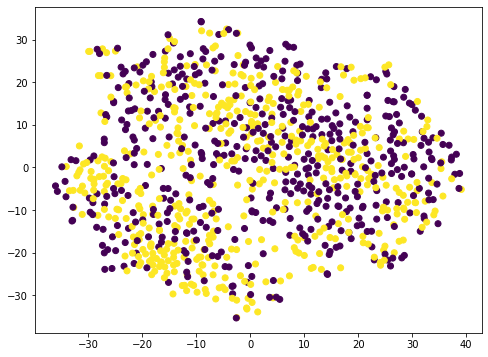

In [33]:
model = TSNE(n_components=2,perplexity=30,n_iter=5000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

# Done using 5000 training samples ; 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

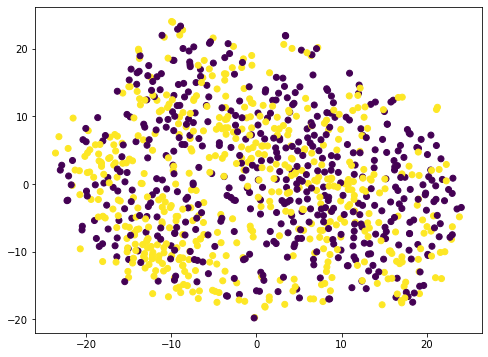

In [34]:
model = TSNE(n_components=2,perplexity=50,n_iter=5000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

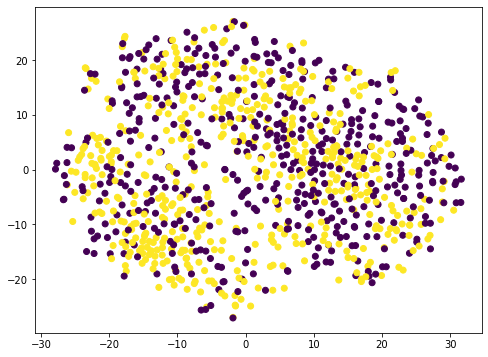

In [35]:
model = TSNE(n_components=2,perplexity=40,n_iter=10000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

# changed perplexity to 40 and iterations to 10k, however the plot seems to not change

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

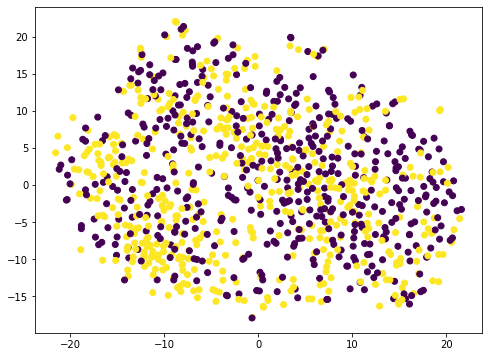

In [36]:
model = TSNE(n_components=2,perplexity=50,n_iter=1000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

# increased perplexity to 50 and n_iter was decreased to 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

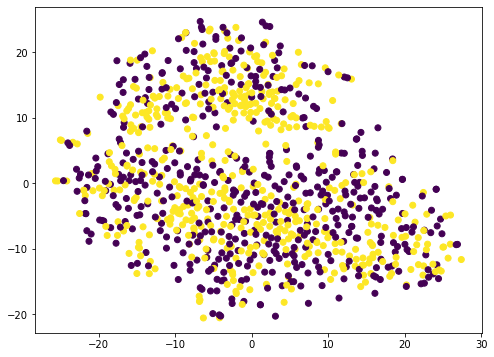

In [37]:
model = TSNE(n_components=2,perplexity=50,n_iter=5000,random_state=0)
tsne_data = model.fit_transform(x_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

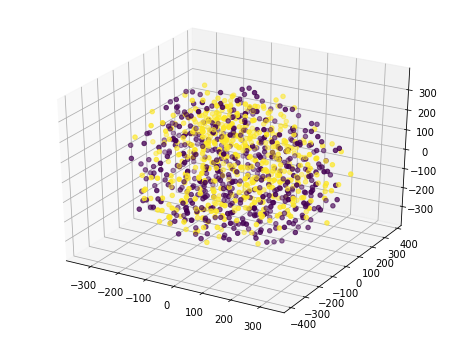

In [38]:
model = TSNE(n_components=3,perplexity=50,n_iter=6000,random_state=0)
tsne_data = model.fit_transform(x_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:,0],tsne_data[:,1],tsne_data[:,2],c=y_reduced)
plt.show()

# Few Inferences

1.   Under an increased pixel resolution of 128 x 128, tSNE plots did not give any distinct decision boundry between the two classes [Parasitized & Uninfected]
2.   After exploring a few range of parameters, no satisfactory clusters were obtained. The dataset seems to have high noise and nonlinear projections obtained with tSNE fail to separate them. 
3. It might be a possibility that a few images were misidentified by the expert. These show up as false positives and false negatives in the dataset, thereby contributing to more noise.

**Further thoughts** : Try implementing tSNE on 3D and play around to find any prospective decision boundry or presensce of any clustering. 